# Images location 1 - Date 1 - Dir 1

### Dataset preview image

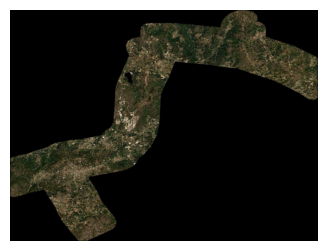

In [1]:
preview_img = '/mnt/0D6BEAD6291820B7/Wilgo/Datasets/dataset_spotLite/images/images_location1/date_1/7070554101/IMG_PHR1A_PMS_001/PREVIEW_PHR1A_PMS_202407221132169_ORT_7070554101.JPG'
import func
func.show_img_jpg(preview_img)

### Show the tiles of the dataset

In [2]:
import tifffile as tiff
import importlib
importlib.reload(func)

# Spectral bands in the image:
# Blue  = X[:, 0]
# Green = X[:, 1]
# Red   = X[:, 2]
# NIR   = X[:, 3]

base_path = '/mnt/0D6BEAD6291820B7/Wilgo/Datasets/dataset_spotLite/images/images_location1/date_1/7070554101/IMG_PHR1A_PMS_001'
prefix = 'IMG_PHR1A_PMS_202407221132169_ORT_7070554101'

tile_paths, rows, cols = func.generate_tile_paths_auto(base_path, prefix)

for row in range(rows):
    for col in range(cols):
        ind = col +  row * cols
        read_img = tiff.imread(tile_paths[ind])
        print(f'Shape TILE R{row+1}C{col+1}: {read_img.shape}')

print(f'We have {ind+1} images (tiles)')

Shape TILE R1C1: (16384, 16384, 4)
Shape TILE R1C2: (16384, 16384, 4)
Shape TILE R1C3: (16384, 16384, 4)
Shape TILE R1C4: (16384, 2749, 4)
Shape TILE R2C1: (16384, 16384, 4)
Shape TILE R2C2: (16384, 16384, 4)
Shape TILE R2C3: (16384, 16384, 4)
Shape TILE R2C4: (16384, 2749, 4)
Shape TILE R3C1: (6222, 16384, 4)
Shape TILE R3C2: (6222, 16384, 4)
Shape TILE R3C3: (6222, 16384, 4)
Shape TILE R3C4: (6222, 2749, 4)
We have 12 images (tiles)


/mnt/0D6BEAD6291820B7/Wilgo/spotlite in tiles/func.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


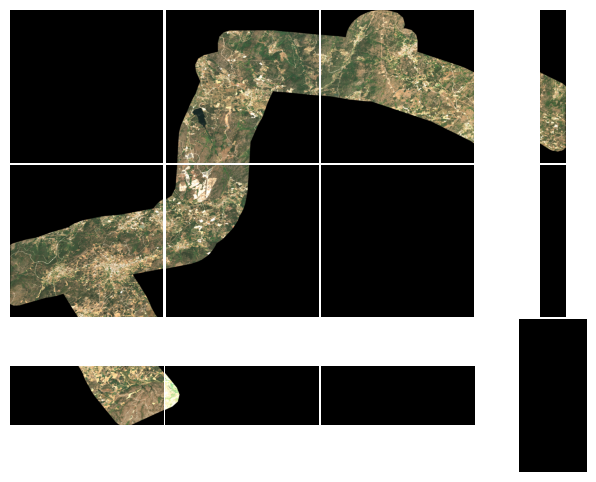

In [3]:
import importlib
importlib.reload(func)

func.show_all_tiles_grid(tile_paths, rows, cols)

### CRS tiles and sharpfile and transform

In [4]:
import importlib
importlib.reload(func)

label_path = "/mnt/0D6BEAD6291820B7/Wilgo/Datasets/dataset_spotLite/labels/labels_location_1/species_workingshp_3.shp"
label_name = "/mnt/0D6BEAD6291820B7/Wilgo/Datasets/dataset_spotLite/labels/labels_location_1/class_nomenclature.txt"

gdf, class_labels = func.show_classes(label_path, label_name)
new_gdf = func.same_CRS(base_path, gdf)

🧩 Unique class IDs found: [1, 2, 3, 4, 5]
🔠 Class names:
  1: no trees
  2: other trees/vegetation
  3: pinus
  4: eucalyptus
  5: shadow

---------CRS-----------
The CRS are iguals: False
CRS Img: EPSG:4326
CRS shapefile: EPSG:3763

-----AFTER TRANSFORM------------
The CRS are iguals: True
CRS Img: EPSG:4326
CRS shapefile: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]


### See classes in Images

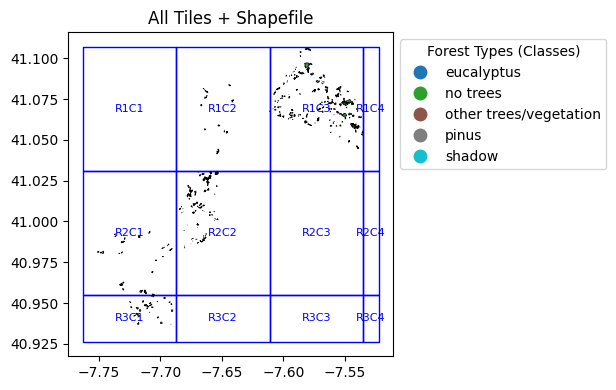

In [5]:
import importlib
importlib.reload(func)

# Show all classes
func.plot_tiles_and_shapefile(base_path, new_gdf, class_labels=class_labels)


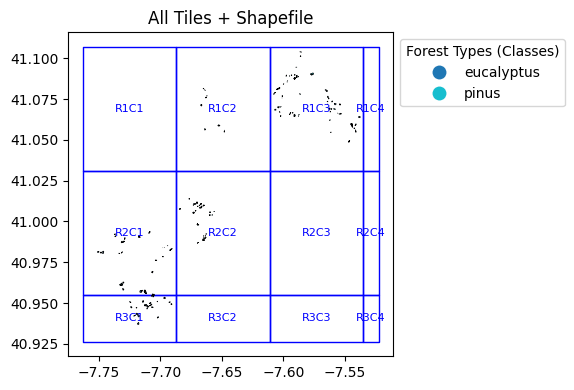

In [6]:
import importlib
importlib.reload(func)

# Show only pinus and eucalyptus
func.plot_tiles_and_shapefile(base_path, new_gdf, class_labels=class_labels, filter_classes=[3, 4])

### Having dataset with Tiles and Mask

In [7]:
import importlib
importlib.reload(func)
import geopandas as gpd

gdf_labels = gpd.read_file(label_path)
gdf_tiles = func.get_tiles_bounds(base_path)

gdf_joined = func.assign_labels_to_tiles(gdf_labels, gdf_tiles)

## ALL CLASSES
tile_ids = gdf_tiles['tile_id'].tolist()
print("Available Tiles:", tile_ids)
print("Tiles with labels:", gdf_joined['tile_id'].unique())

Available Tiles: ['R1C1', 'R1C2', 'R1C3', 'R1C4', 'R2C1', 'R2C2', 'R2C3', 'R2C4', 'R3C1', 'R3C2', 'R3C3', 'R3C4']
Tiles with labels: ['R1C3' 'R1C4' 'R1C2' 'R2C1' 'R3C1' 'R2C2']


In [8]:
import importlib
importlib.reload(func)

desired_classes = [3, 4]  # For example: 3 = pinus, 4 = eucalyptus

filtered_labels = gdf_joined[gdf_joined['classnum2'].isin(desired_classes)].copy()

tile_ids_with_labels = filtered_labels['tile_id'].unique()

filtered_tile_paths = [p for p in tile_paths if func.get_tile_id_from_path(p) in tile_ids_with_labels]

tiles_data = func.load_full_images_and_masks(filtered_tile_paths, filtered_labels)

✅ Loaded 5 tiles into memory.


### Verify dataset

In [9]:
import importlib
importlib.reload(func)

for tile in tiles_data:
    print(f"Tile: {tile['tile_id']} -> Tile shape: {tile['image'].shape}, Mask shape: {tile['mask'].shape}")


Tile: R1C2 -> Tile shape: (4, 16384, 16384), Mask shape: (16384, 16384)
Tile: R1C3 -> Tile shape: (4, 16384, 16384), Mask shape: (16384, 16384)
Tile: R2C1 -> Tile shape: (4, 16384, 16384), Mask shape: (16384, 16384)
Tile: R2C2 -> Tile shape: (4, 16384, 16384), Mask shape: (16384, 16384)
Tile: R3C1 -> Tile shape: (4, 6222, 16384), Mask shape: (6222, 16384)


In [10]:
import importlib
importlib.reload(func)

func.check_class_distribution_in_tiles_data(tiles_data)

R1C2: classes found -> [0 3]
R1C3: classes found -> [0 3 4]
R2C1: classes found -> [0 3 4]
R2C2: classes found -> [0 3 4]
R3C1: classes found -> [0 3 4]

✅ Total unique classes across all masks: [0, 3, 4]
📊 Total pixel count and class percentage:
  Class 0: 1,173,657,209 pixels (99.83%)
  Class 3: 687,567 pixels (0.06%)
  Class 4: 1,338,296 pixels (0.11%)


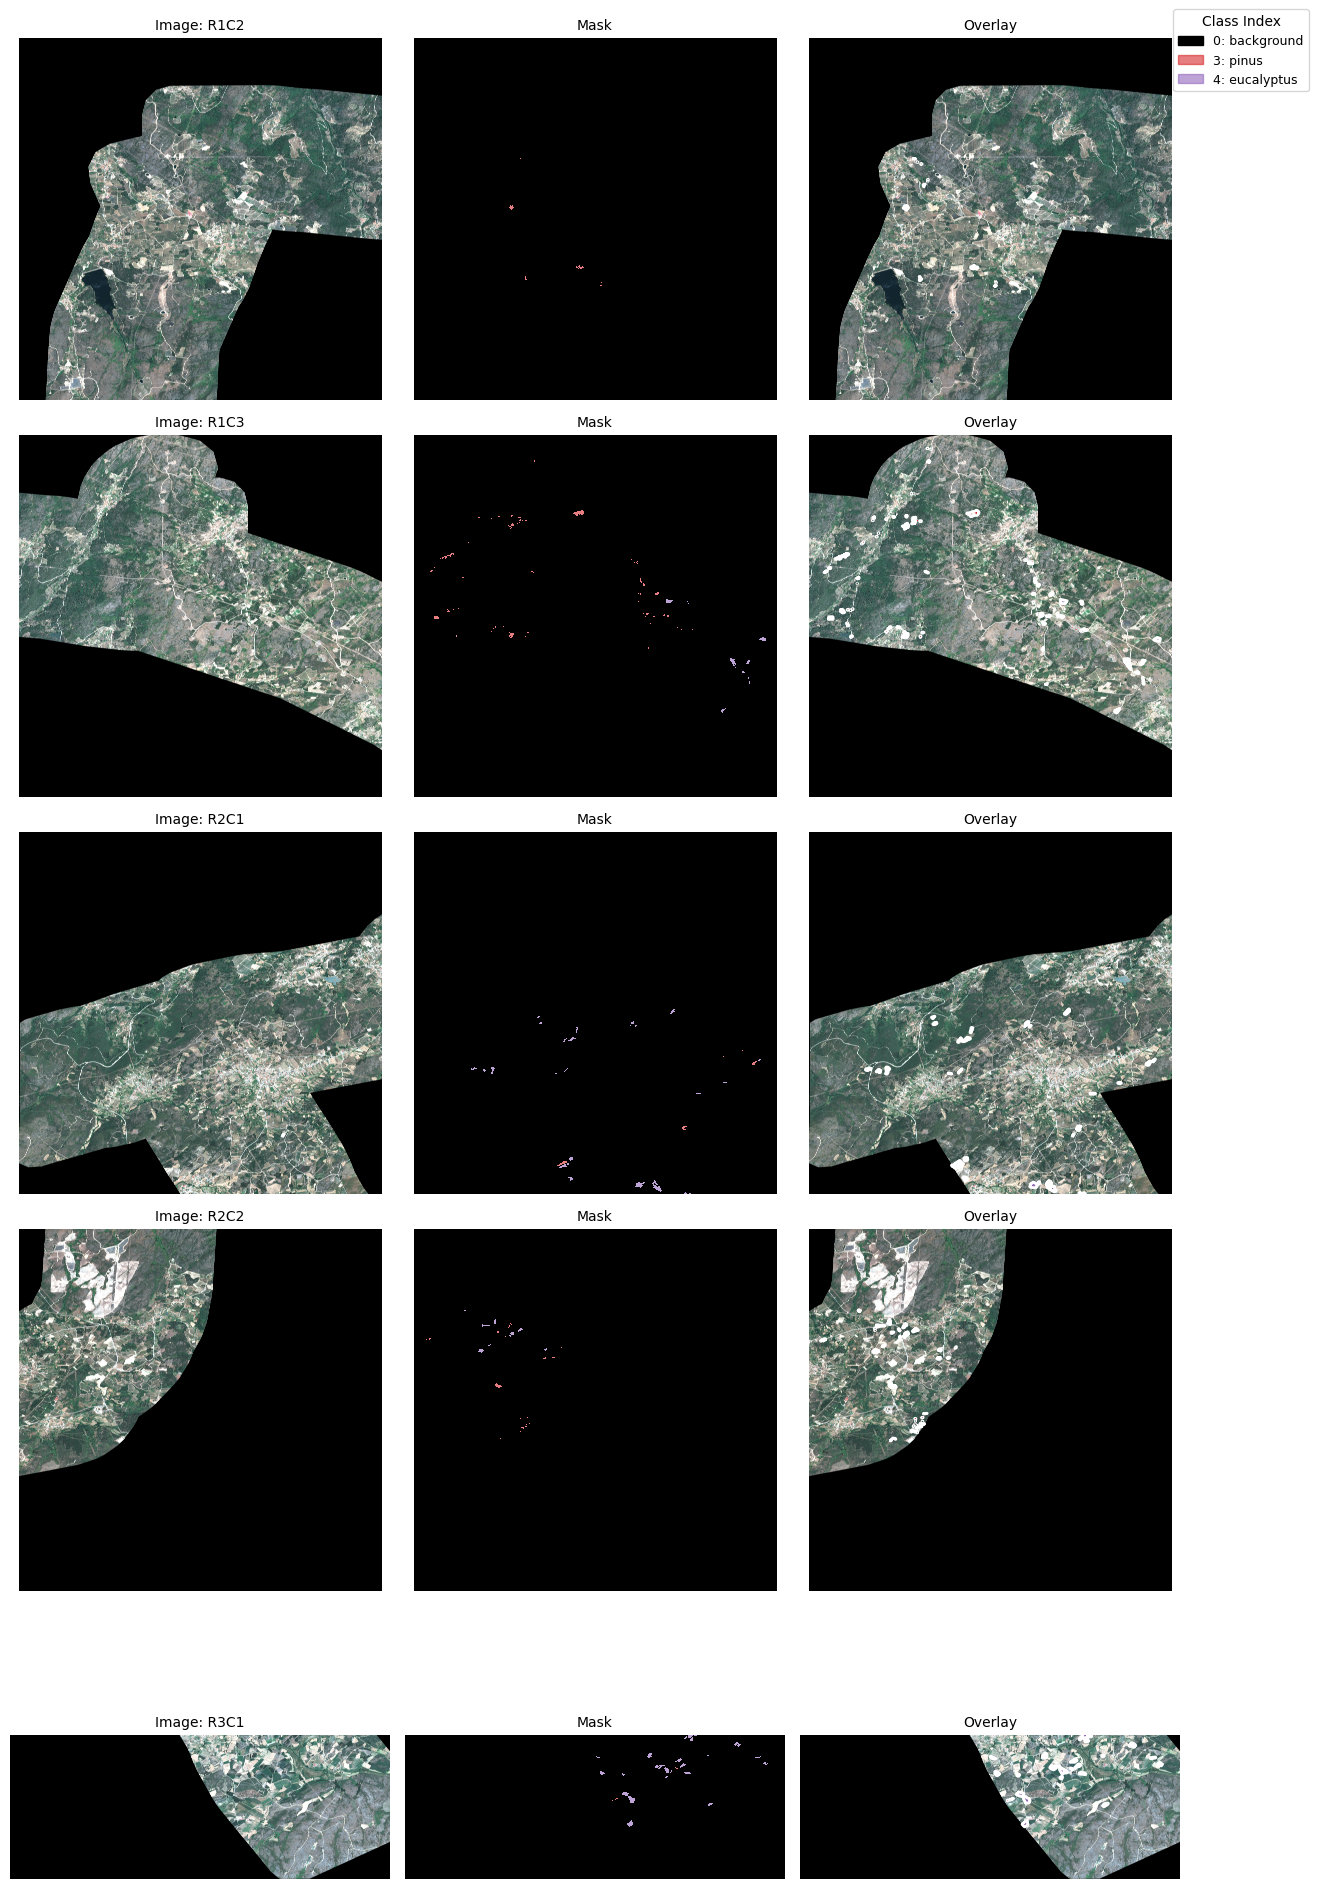

In [11]:
import importlib
importlib.reload(func)

func.visualize_tiles_data(tiles_data, desired_classes)

### Create dataset in patches format

In [20]:
import importlib
importlib.reload(func)

dataset_dir = 'spotlite_dataset_loca1_date1_dir1'
func.generate_patches_from_tiles_data(tiles_data, dataset_dir, 512, include_empty=True)

Tile R1C2: patches saved so far: 1024
Tile R1C3: patches saved so far: 2048
Tile R2C1: patches saved so far: 3072
Tile R2C2: patches saved so far: 4096
Tile R3C1: patches saved so far: 4480

🎉 Total patches saved: 4480
📊 Quick patch statistics:
  empty: 4289
  non_empty: 191


In [21]:
import os
import tifffile as tiff

n = 5 

images_dataset_dir = os.path.join(dataset_dir, 'images')
masks_dataset_dir = os.path.join(dataset_dir, 'masks')

image_files = sorted(os.listdir(images_dataset_dir))
mask_files = sorted(os.listdir(masks_dataset_dir))

n = min(n, len(image_files), len(mask_files))
image_files = image_files[:n]
mask_files = mask_files[:n]

print('Shape of each image and its mask:')
for image_file, mask_file in zip(image_files, mask_files):
    image_path = os.path.join(images_dataset_dir, image_file)
    mask_path = os.path.join(masks_dataset_dir, mask_file)

    read_img = tiff.imread(image_path)
    read_mask = tiff.imread(mask_path)

    print(f'{image_file} -> Image: {read_img.shape}, Mask: {read_mask.shape}')


Shape of each image and its mask:
R1C2_y0_x0.tif -> Image: (512, 512, 4), Mask: (512, 512)
R1C2_y0_x1024.tif -> Image: (512, 512, 4), Mask: (512, 512)
R1C2_y0_x10240.tif -> Image: (512, 512, 4), Mask: (512, 512)
R1C2_y0_x10752.tif -> Image: (512, 512, 4), Mask: (512, 512)
R1C2_y0_x11264.tif -> Image: (512, 512, 4), Mask: (512, 512)


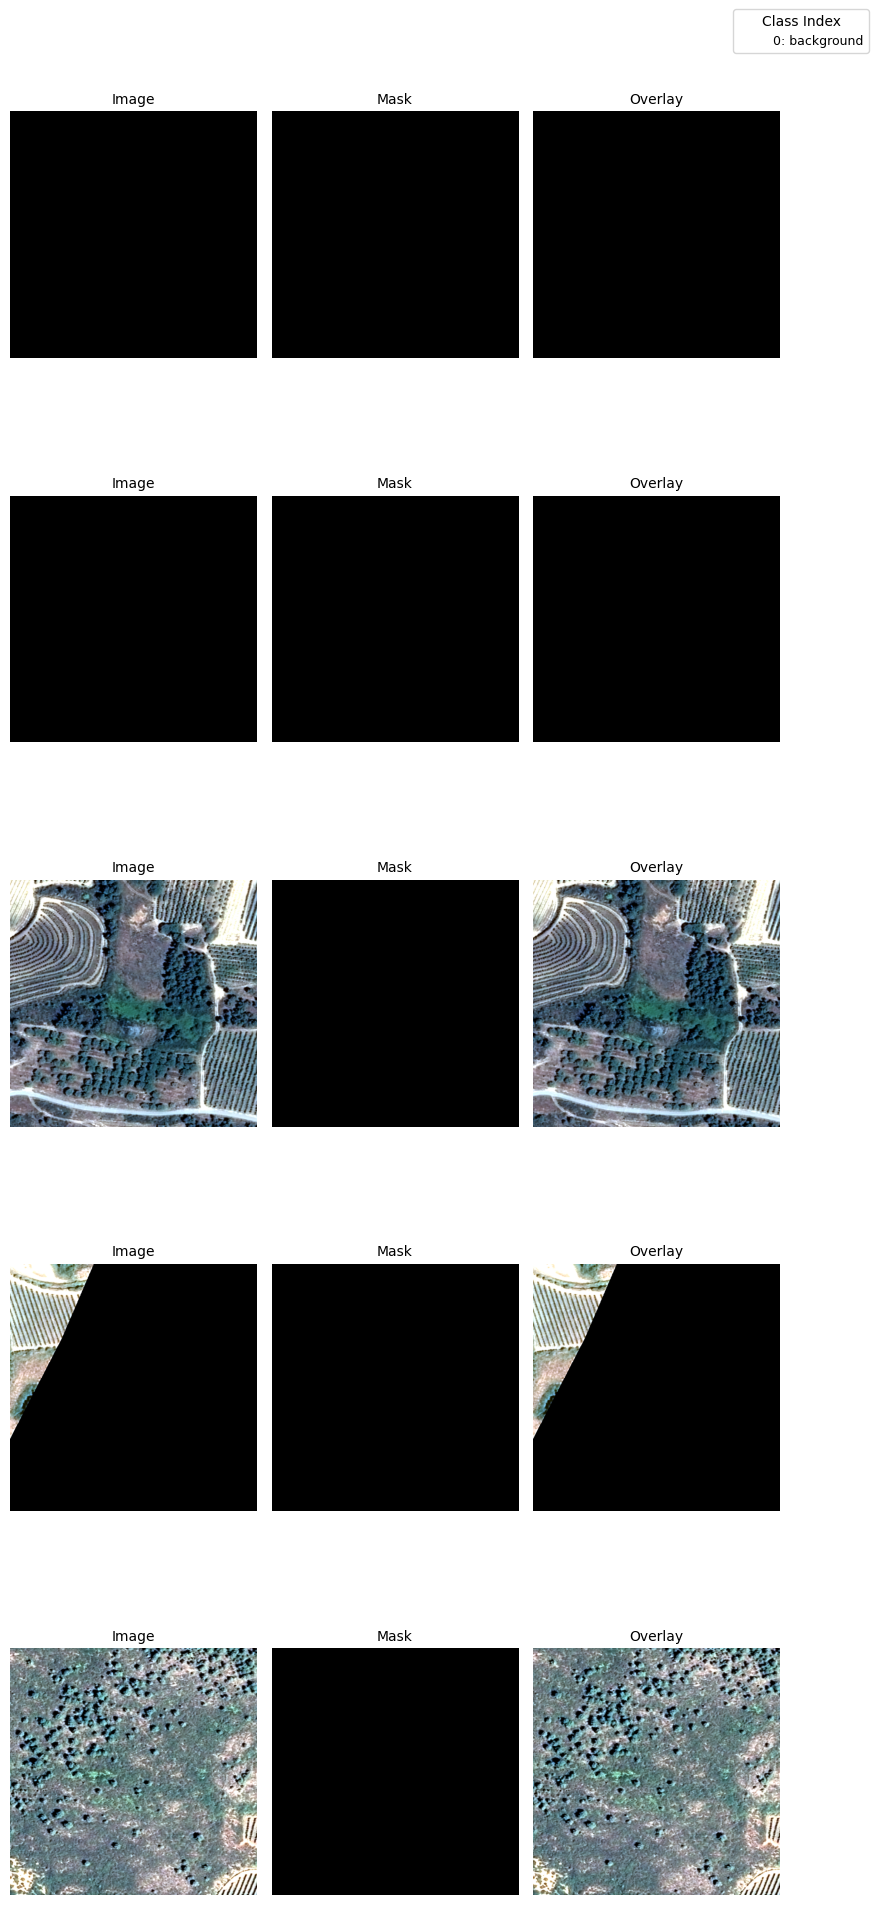

In [22]:
import importlib
importlib.reload(func)

images_dataset_dir = os.path.join(dataset_dir, 'images')
masks_dataset_dir = os.path.join(dataset_dir, 'masks')

number_of_images = 5
select_images = [3, 4, 55, 130, 180]  # Example indices of images to visualize

func.visualize_image_mask_overlay(images_dataset_dir, masks_dataset_dir, desired_classes, number_of_images, select_images)